<a href="https://colab.research.google.com/github/MohamedIsmailMihal/TSF-Task/blob/main/Prediction_Using_Supervised_ML_Student_Percentage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Using Supervised ML**
This Basic Machine Learning Task can predict the percentage of a student based on the number of hours of study Using Linear Regression on two variables- Hours of study and Marks scored.

Firstly, all the required libraries for the notebook is imported.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Now, we use pandas to get the data from the csv file.

> data.head() is used to show the first five values from the dataset.


In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


This is to check if the dataset is empty or not

In [ ]:
data.isnull == True

False

We have three plots in this notebook, the first plot is simply the plot of given data in the dataset.

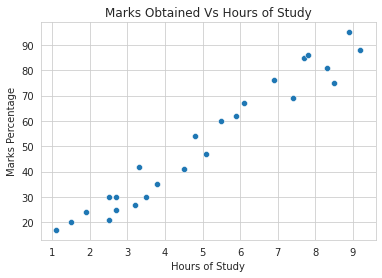

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Obtained Vs Hours of Study')
plt.xlabel('Hours of Study')
plt.ylabel('Marks Percentage')
plt.show()

The second plot is the regression plot which gives the user a visual guide to emphasize the patterns in the dataset.

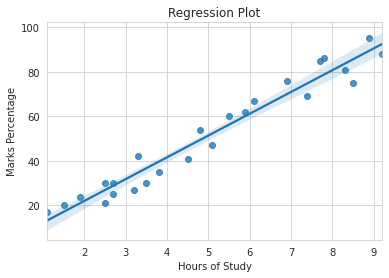

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours of Study')
plt.ylabel('Marks Percentage')
plt.show()
print(data.corr())

Now, we divide the data into labels and attributes and then, we split the dataset into training sets and test sets.

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 0)

This is the actual machine learning part of this notebook, the function LinearRegression() from sklearn is used to train the algorithm.

In [ ]:
rtrain= LinearRegression()
rtrain.fit(train_X, train_y)
print("Completed Algorithm Training")

Completed Algorithm Training


Now that we have our trained model, we shall now use it to try and predict the testing dataset

In [ ]:
predict_y = rtrain.predict(test_X)
p = pd.DataFrame({'Hours of Study': [i[0] for i in test_X], 'Predicted Marks': [k for k in predict_y]})
p

,Hours of Study,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


Next, we shall compare the predicted marks with the actual data from the test set. 

In [ ]:
cmpn = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': predict_y})
cmpn

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


The third plot of this notebook is the visualization of the above comparison.

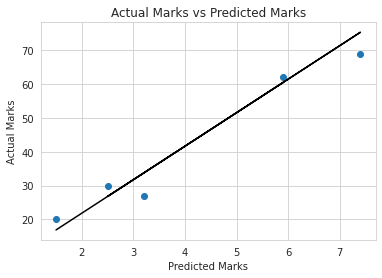

In [ ]:
plt.scatter(x=test_X, y=test_y)
plt.plot(test_X, predict_y, color='Black')
plt.title('Actual Marks vs Predicted Marks')
plt.xlabel('Predicted Marks')
plt.ylabel('Actual Marks')
plt.show()

Finally, The actual test with values from the question
> "What will be the predicted score if a student studies 9.25 hours a day?"




In [ ]:
hours = [9.25]
predicted_val = rtrain.predict([hours])
print("Predicted Score for {} hours".format(hours[0]),end=" ") 
print("of study= {}".format(predicted_val[0],6))

Predicted Score for 9.25 hours of study= 93.69173248737539


Also, the performance of our model based on Mean Absolute Error

In [ ]:
print("Mean absolute error: ",mean_absolute_error(test_y,predict_y))

Mean absolute error:  4.183859899002982
